In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('../../datasets/titanic_toy.csv')
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [12]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

## Method 1. Using Pandas

In [13]:
mean_age = df["Age"].mean()
median_age = df["Age"].median()

mean_Fare = df["Fare"].mean()
median_Fare = df["Fare"].median()

In [14]:
X_train['Age_median']= X_train['Age'].fillna(median_age)
X_train['Age_mean']= X_train['Age'].fillna(mean_age)


X_train['Fare_median']= X_train['Fare'].fillna(median_Fare)
X_train['Fare_mean']= X_train['Fare'].fillna(mean_Fare)

In [15]:
X_train.sample(10)

Age     Fare  Family  Age_median   Age_mean  Fare_median  Fare_mean
1    38.0  71.2833       1        38.0  38.000000      71.2833  71.283300
509  26.0  56.4958       0        26.0  26.000000      56.4958  56.495800
845  42.0   7.5500       0        42.0  42.000000       7.5500   7.550000
666  25.0  13.0000       0        25.0  25.000000      13.0000  13.000000
457   NaN  51.8625       1        28.0  29.699118      51.8625  51.862500
11   58.0  26.5500       0        58.0  58.000000      26.5500  26.550000
518  36.0      NaN       1        36.0  36.000000      14.4542  32.279338
727   NaN   7.7375       0        28.0  29.699118       7.7375   7.737500
634   9.0  27.9000       5         9.0   9.000000      27.9000  27.900000
357  38.0  13.0000       0        38.0  38.000000      13.0000  13.000000

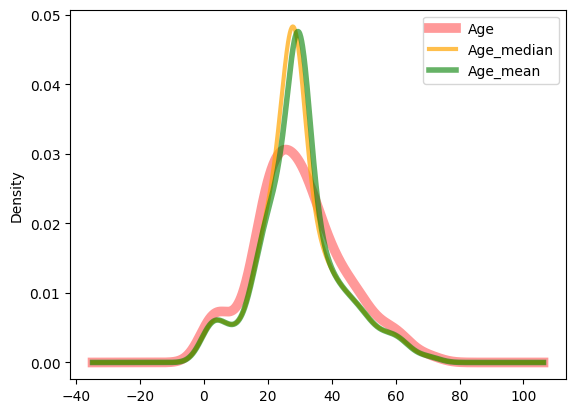

In [29]:
fig, ax = plt.subplots()

X_train['Age'].plot(kind='kde',ax=ax,color='red',linewidth=7,alpha=0.4)

X_train['Age_median'].plot(kind='kde',ax=ax,color='orange',linewidth=3,alpha=0.7)

X_train['Age_mean'].plot(kind='kde',ax=ax,color='green',linewidth=4,alpha=0.6)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best')

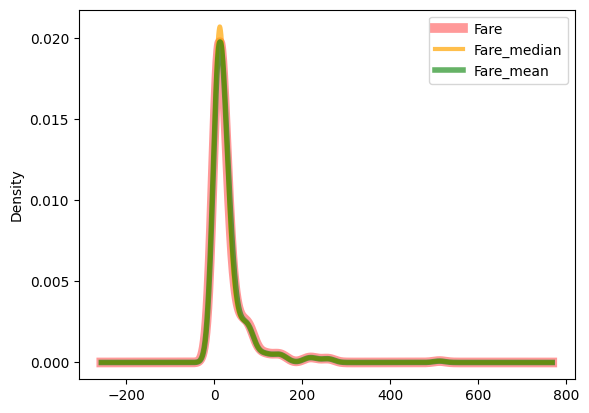

In [30]:
fig, ax = plt.subplots()

X_train['Fare'].plot(kind='kde',ax=ax,color='red',linewidth=7,alpha=0.4)

X_train['Fare_median'].plot(kind='kde',ax=ax,color='orange',linewidth=3,alpha=0.7)

X_train['Fare_mean'].plot(kind='kde',ax=ax,color='green',linewidth=4,alpha=0.6)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best')

In [31]:
X_train.cov()

Age         Fare     Family  Age_median    Age_mean  \
Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
Fare          70.719262  2448.197914  17.258917   59.661820   55.800924   
Family        -6.498901    17.258917   2.735252   -5.088278   -5.143296   
Age_median   204.349513    59.661820  -5.088278  162.338530  161.838181   
Age_mean     204.349513    55.800924  -5.143296  161.838181  161.813866   
Fare_median   64.858451  2448.197914  16.476326   55.142638   51.541608   
Fare_mean     66.631558  2448.197914  16.386748   56.613065   52.948856   

             Fare_median    Fare_mean  
Age            64.858451    66.631558  
Fare         2448.197914  2448.197914  
Family         16.476326    16.386748  
Age_median     55.142638    56.613065  
Age_mean       51.541608    52.948856  
Fare_median  2340.098181  2324.533881  
Fare_mean    2324.533881  2324.244026

#### To see the outliers

<AxesSubplot: >

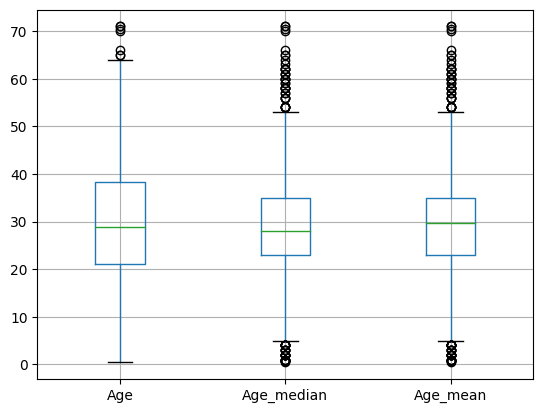

In [32]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<AxesSubplot: >

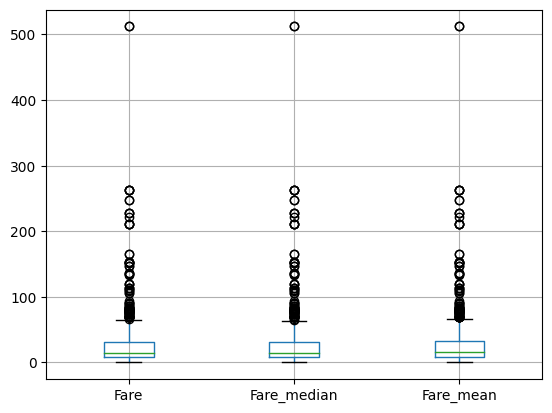

In [33]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

## Method 2. Using Sklearn

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
imputer_1 = SimpleImputer(strategy='median')
imputer_2 = SimpleImputer(strategy='mean')

In [36]:
trf = ColumnTransformer([
    ('imputer_1',imputer_1,['Age']),
    ('imputer_2',imputer_2,['Fare']),
    
], remainder='passthrough')

In [37]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer_2', SimpleImputer(), ['Fare'])])

In [39]:
trf.named_transformers_['imputer_1'].statistics_

array([28.75])

In [40]:
trf.named_transformers_['imputer_2'].statistics_

array([32.61759689])

In [41]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [42]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])